<a href="https://colab.research.google.com/github/ShuklaRajni/Bank_marketing_effective_prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [72]:
# importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# **Importing and Loading data**

In [76]:
# Mounting the Drive first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Loading and reading the dataset
data=pd.read_csv('/content/drive/MyDrive/Bank Marketing Effective Prediction Analysis-Capstone Project3/bank-full.csv',sep=';')
df = data.copy()

In [81]:
#Checking the head and tail of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [83]:
# Shape of the Dataset(Row,Column)
df.shape

(45211, 17)

*   We have 45211 rows and 17 columns in our dataset.

In [84]:
# Basic information about dataset like null values , datatype , number of rows & column etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [85]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### **Checking null values**

In [86]:
# check null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*   **There is no null values present in the dataset**.

In [87]:
# checking unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [88]:
# checking the duplicate values in our data
df.duplicated().value_counts()

False    45211
dtype: int64

*   **There is no duplicate values present in the dataset**



## **DESCRIPTIVE ANALYSIS**

We have two types of variables in our data set.

i) Continuous Variables

ii) Categorical Variables.


In [89]:
# some important statistical description of feature in our dataset
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [90]:
# List of Categorical feature
categorical_feature = list(df.select_dtypes(include=['object']))
categorical_feature

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [91]:
# List of continuous feature
continuous_feature = list(df.select_dtypes(exclude=['object']))
continuous_feature

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# **EXPLORATORY DATA ANALYSIS (EDA)**

##**Target Variable**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. y distribution looks like.

Target Variable : y - has the client subscribed a term deposit? (binary: 'yes','no')

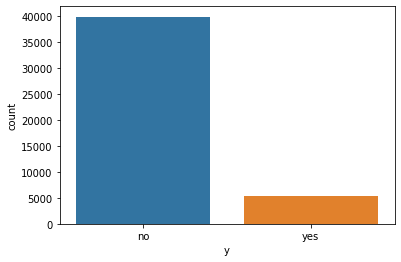

In [92]:
# Visualize the target variable
g = sns.countplot(df['y'])

**As We Can See that Data is highly imbalanced.Majority of the data points belong to no class. Ratio of No class to yes class is 8:1**

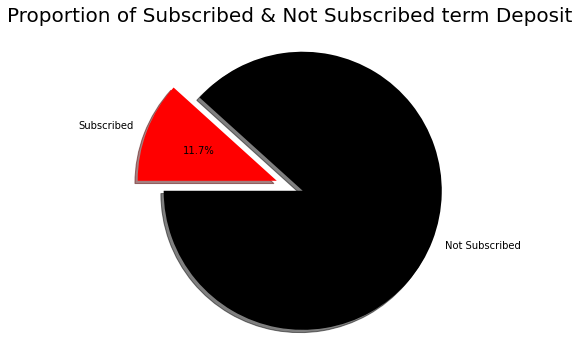

In [93]:
# visualize how many customers have subscribed

labels = 'Not Subscribed', 'Subscribed' 
sizes = df.y.value_counts()
colors = ['black', 'red']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Proportion of Subscribed & Not Subscribed term Deposit",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**Only 11.7% people have subscribed our product**

## **UNIVARIATE ANALYSIS**

Let’s start doing EDA on rest of the columns of the datapoints.

###**Categorical Features Exploration**

Column name :  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


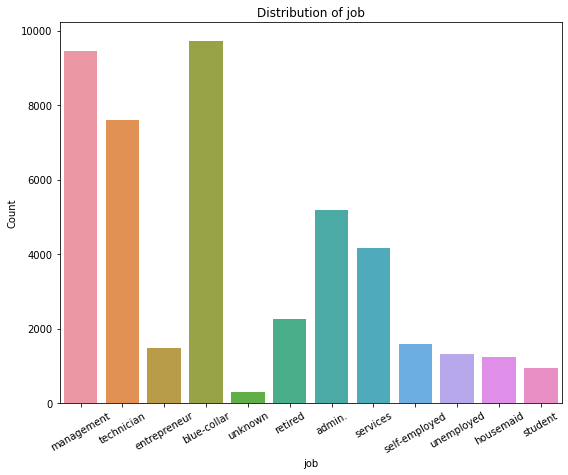

Column name :  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


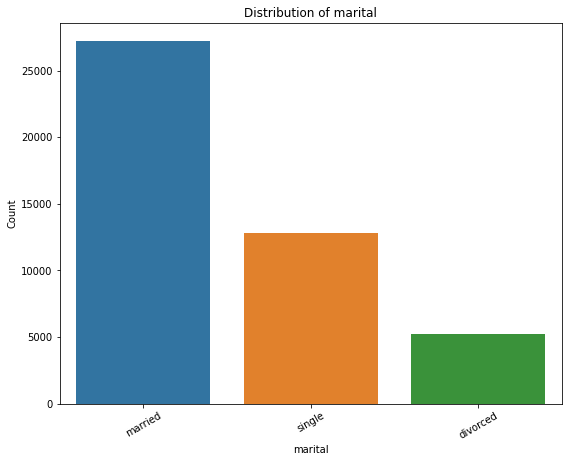

Column name :  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


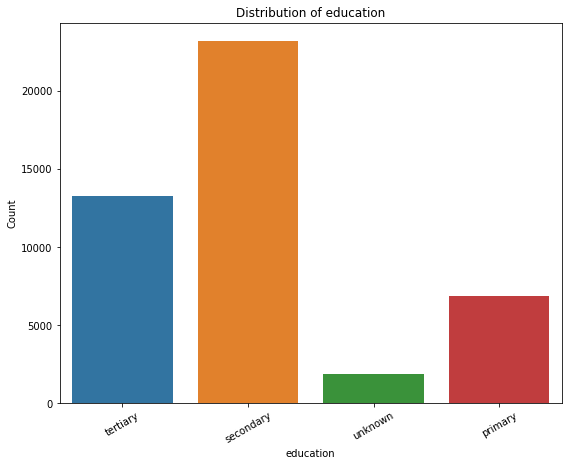

Column name :  default
no     44396
yes      815
Name: default, dtype: int64


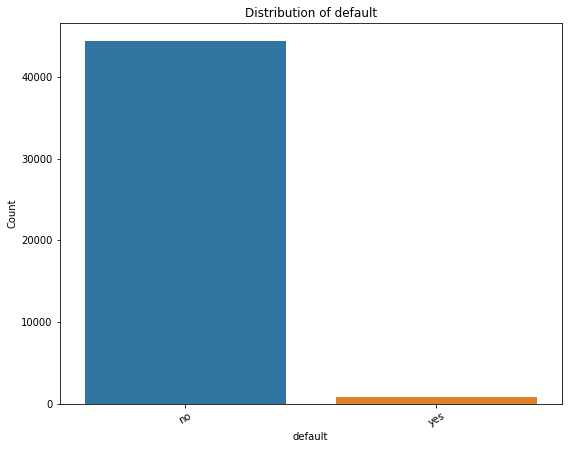

Column name :  housing
yes    25130
no     20081
Name: housing, dtype: int64


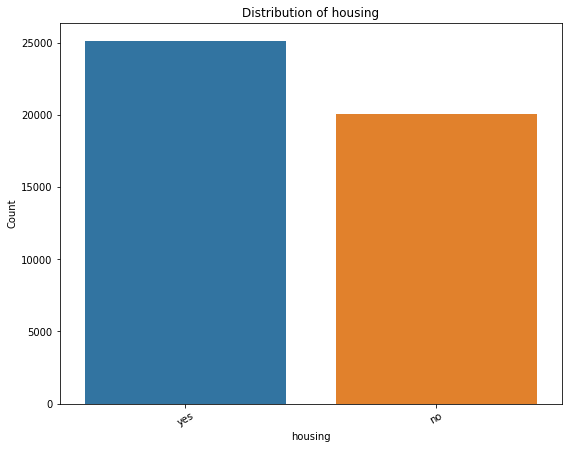

Column name :  loan
no     37967
yes     7244
Name: loan, dtype: int64


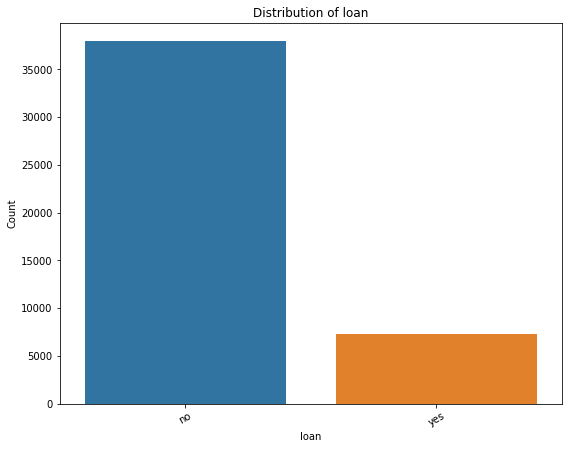

Column name :  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


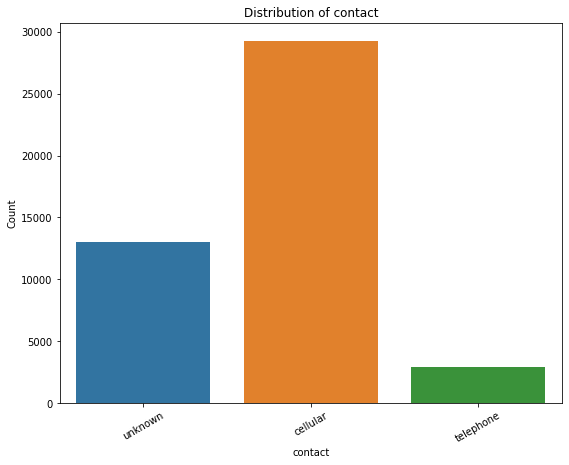

Column name :  month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


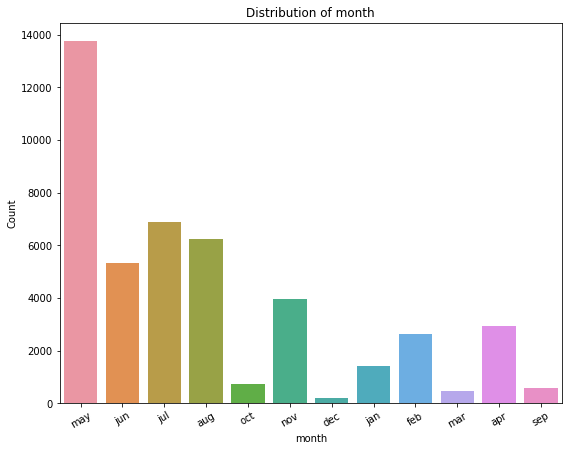

Column name :  poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


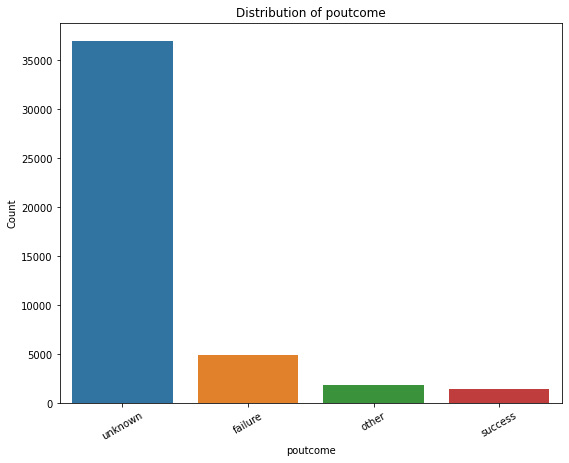

Column name :  y
no     39922
yes     5289
Name: y, dtype: int64


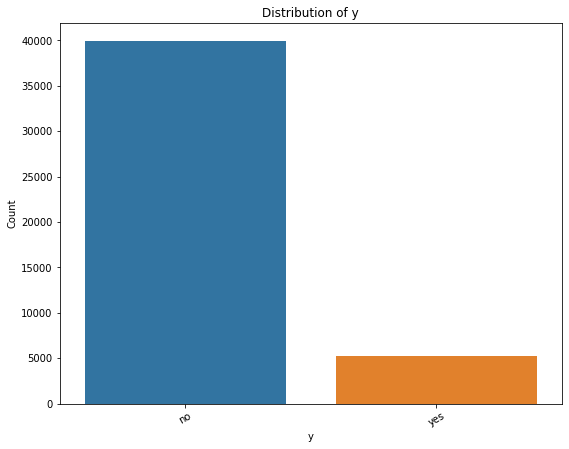

In [95]:
#Countplot of categorical features
for col in categorical_feature:
  print('Column name : ' , col)
  print(data[col].value_counts())
  plt.figure(figsize=(9,7))
  sns.countplot(x = data[col])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

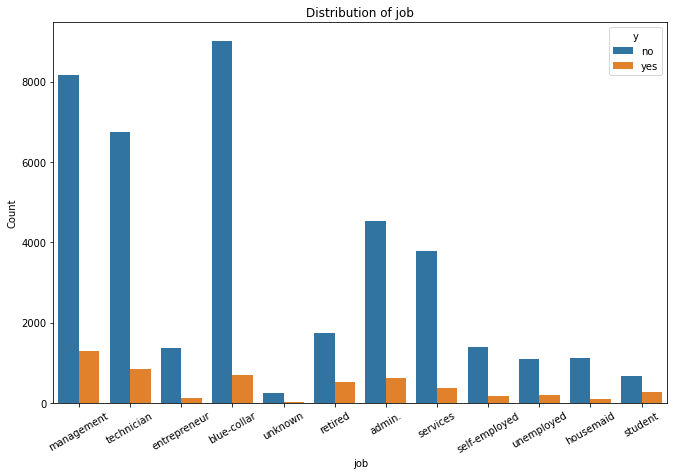

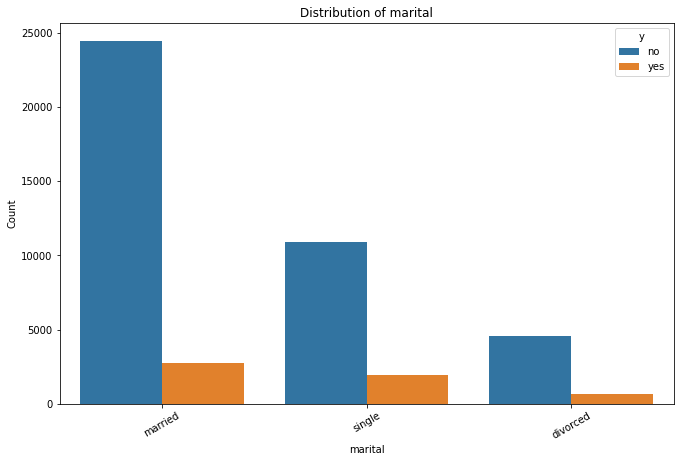

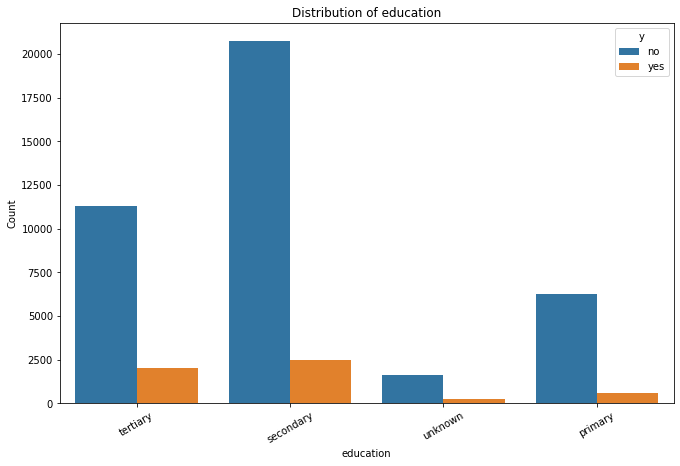

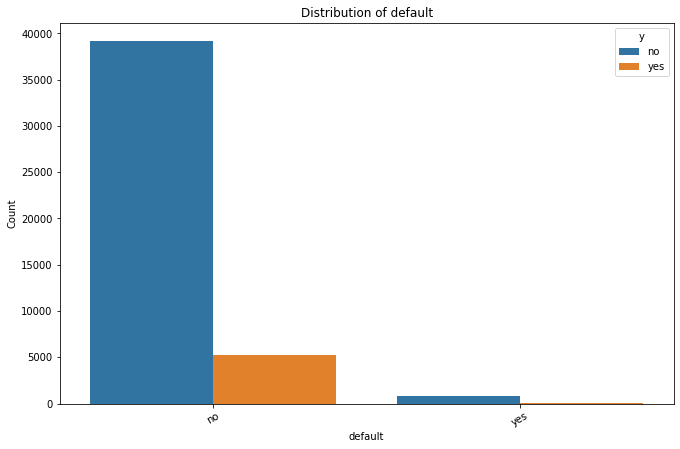

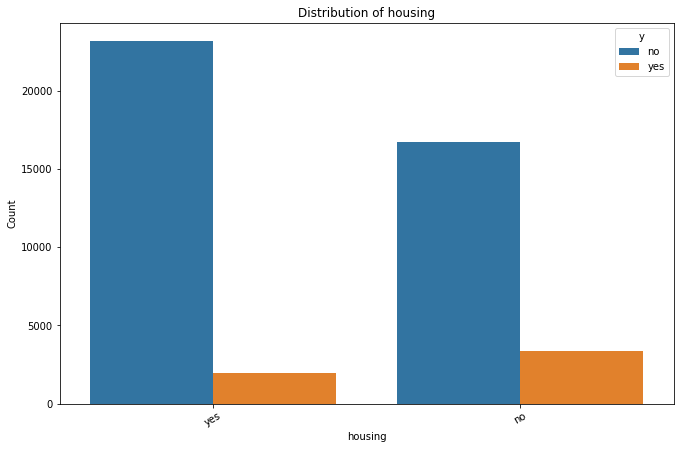

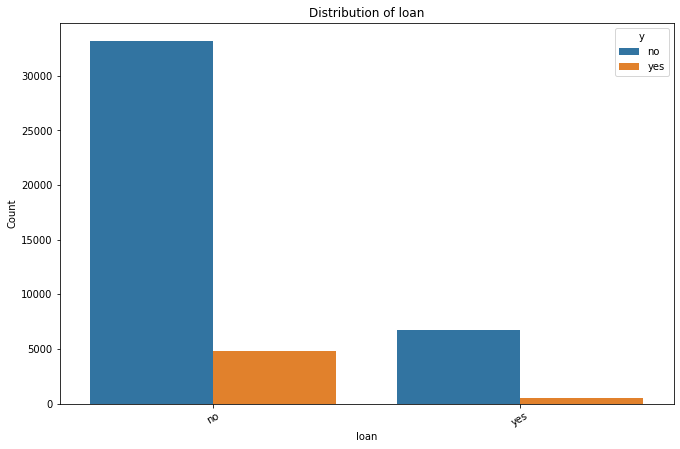

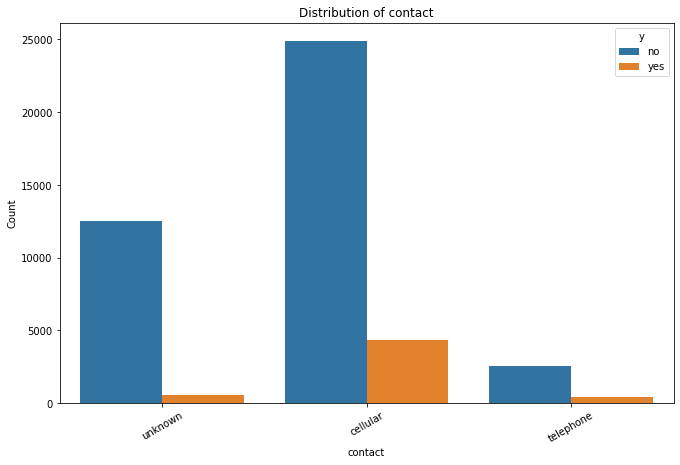

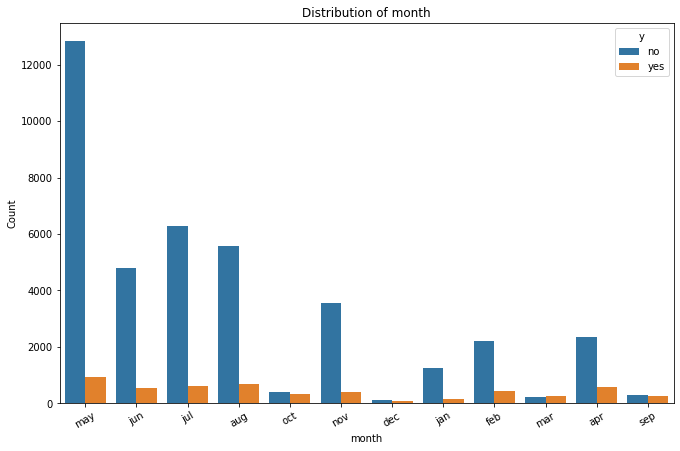

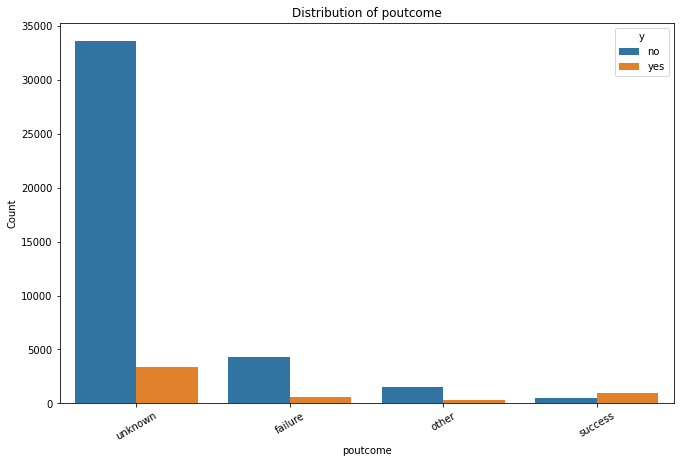

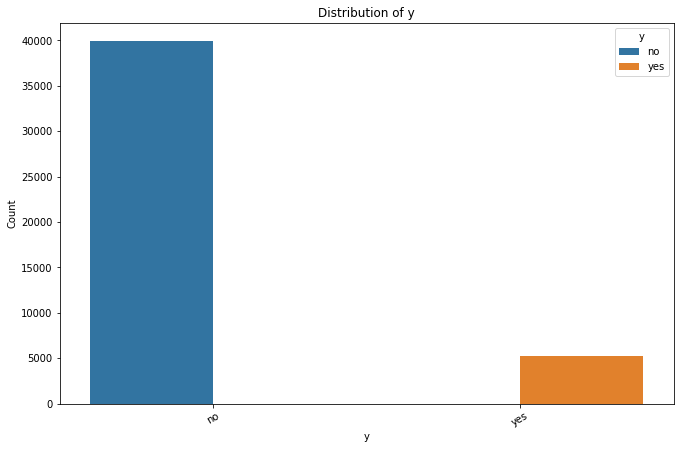

In [96]:
#Countplot of categorical features
for col in categorical_feature:
  plt.figure(figsize=(11,7))
  sns.countplot(x = data[col] , hue=data['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.title("Distribution of {}".format(col))
  plt.xticks(rotation=30)
  plt.show()

### **From the above plots we can analyze that:**

- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.

- Success rate is highest for student.

- Most of the people who are contacted have tertiary or secondary education.


- Most of the clients contacted have previous outcome as 'unknown'.

- Most of the people are contacted through cellular.

- Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.

- Very few clients are contacted who are defaulter.

- March has highest success rate.


- As seen for default variable, less client are contacted who have loan.


- As we can see that married people are more tend to invest in product and have subscribed more in comparison to others.

###**Continuous Features Exploration**

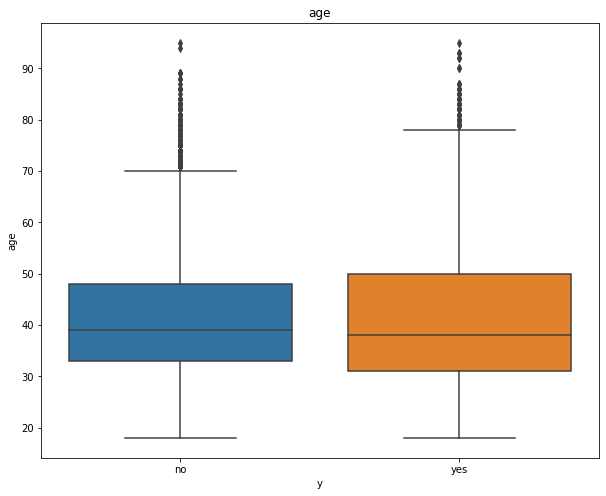

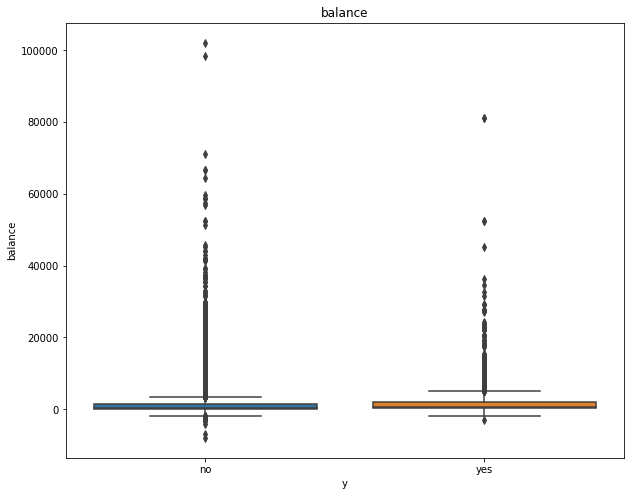

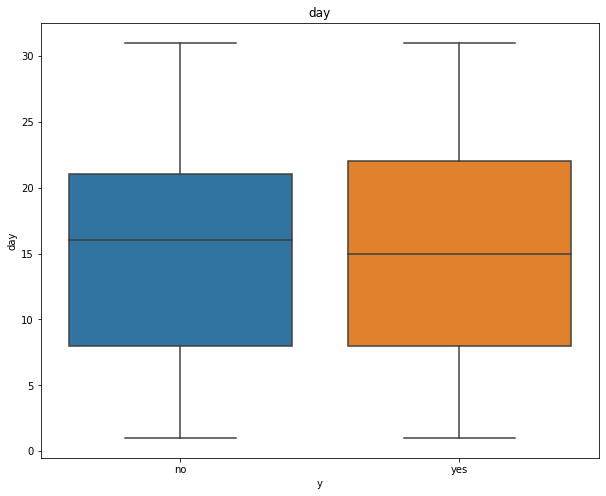

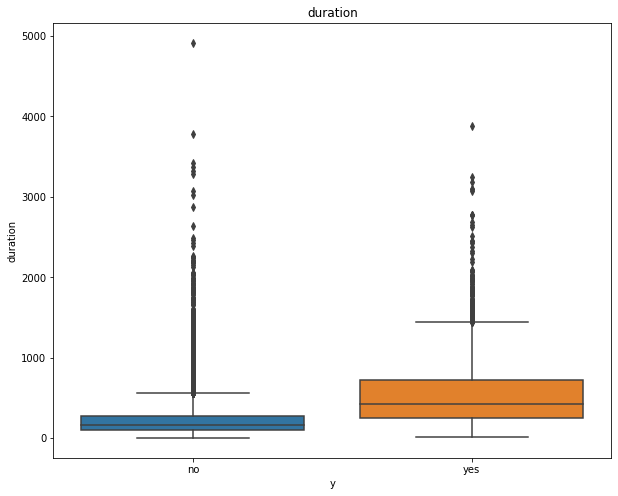

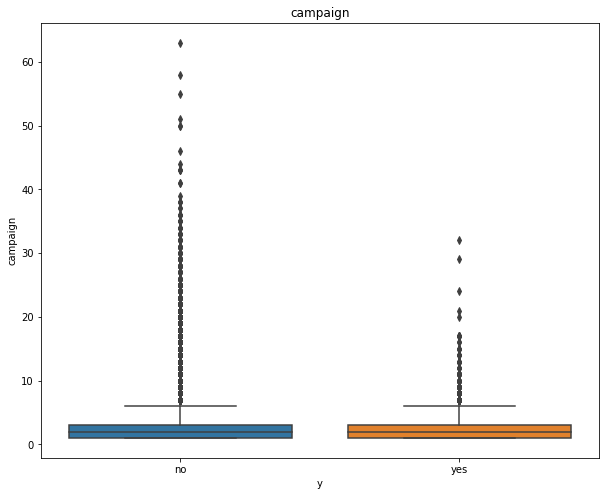

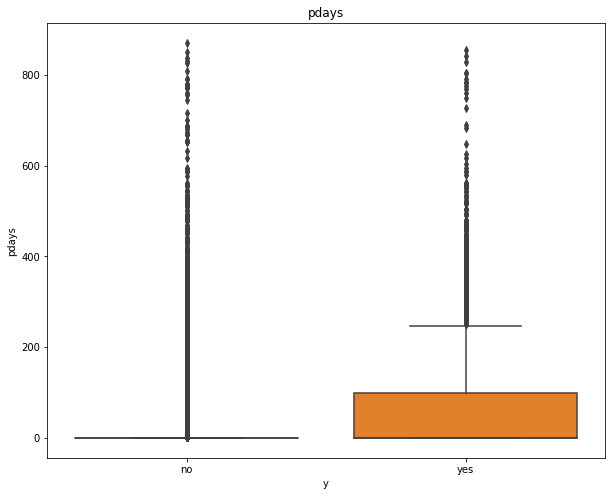

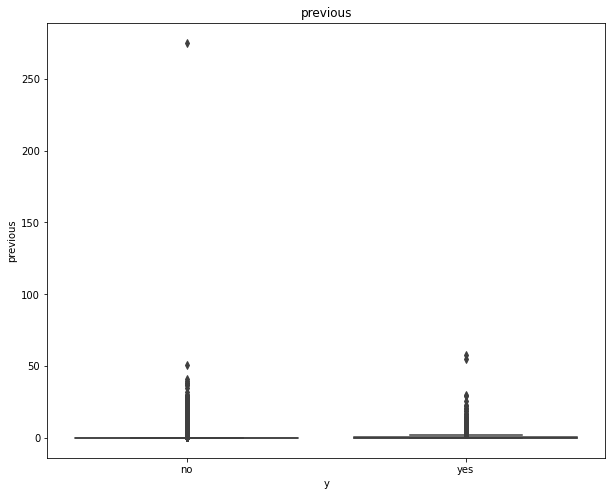

In [97]:
# Box plot of continuous feature
for col in continuous_feature:
  plt.figure(figsize=(10,8))
  sns.boxplot(data=data, x="y", y=col)
  plt.title(col)
  plt.show()

*   **In the above plot it is clear that a majority of customers called is in the age of 30s and 40s (33 to 48 years old fall within the 25th to 75th percentiles) and for each of the target variable the age feauture is not linearly seperable.Thus  age will be of less importance to us.**
*   **As We can see that there are many Outliers in No part As well Yes Part but here our data is Imbalanced so we are keeping this Outliers**





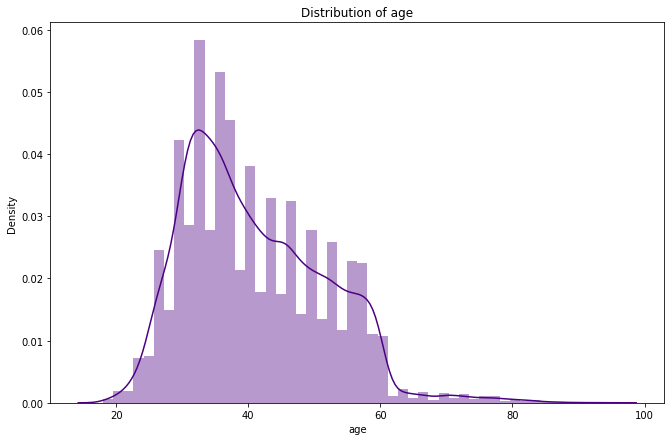

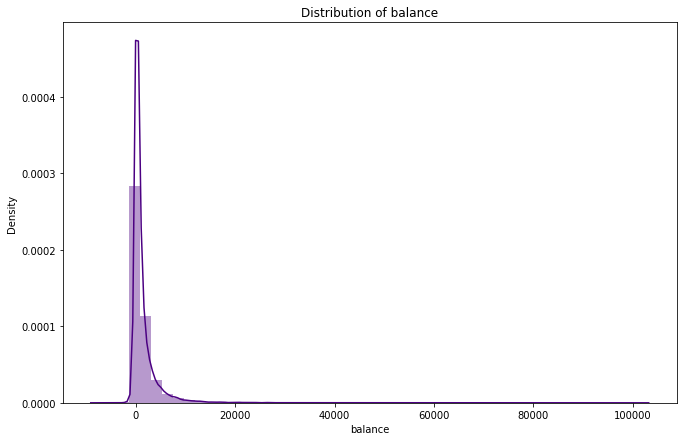

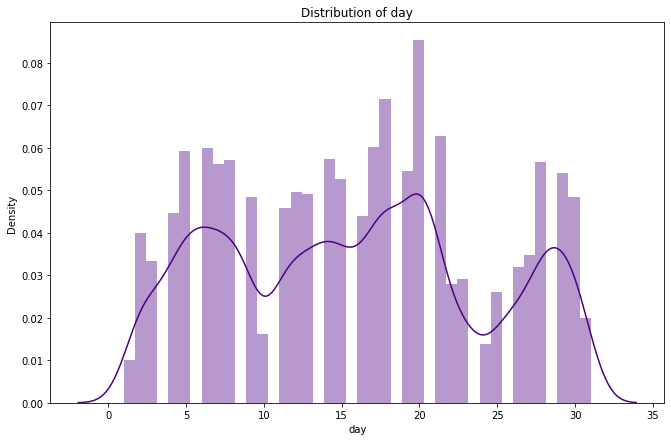

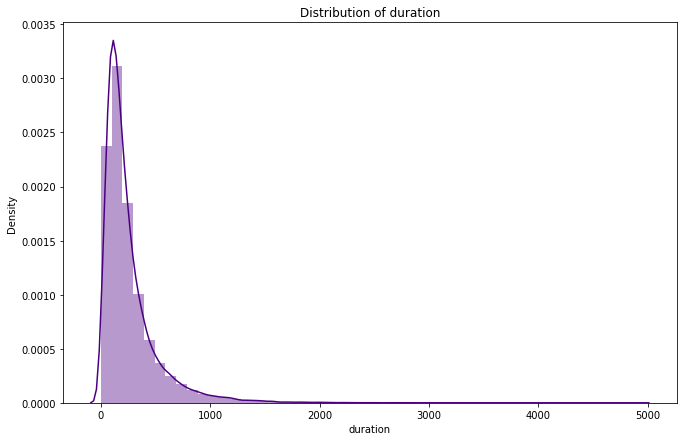

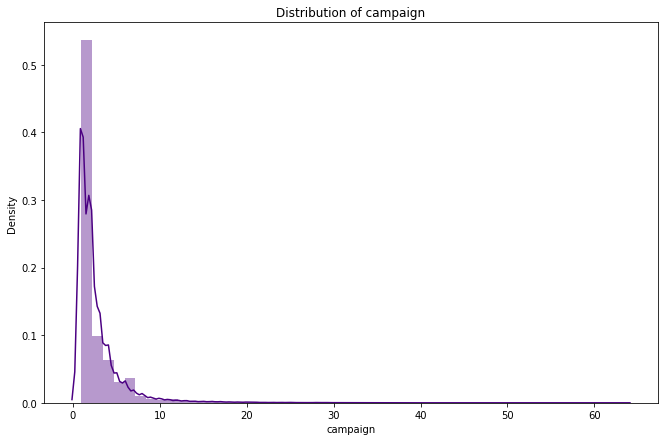

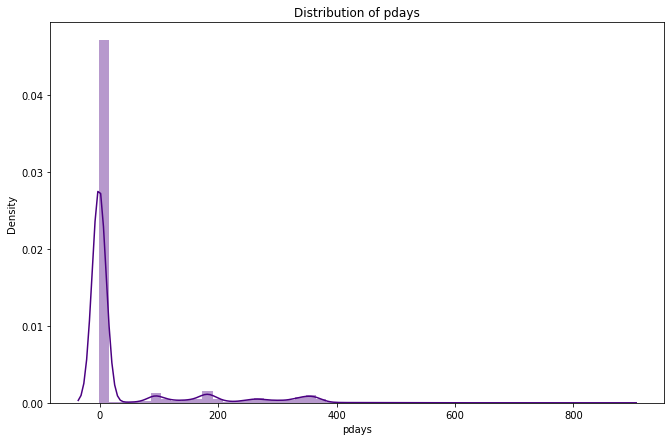

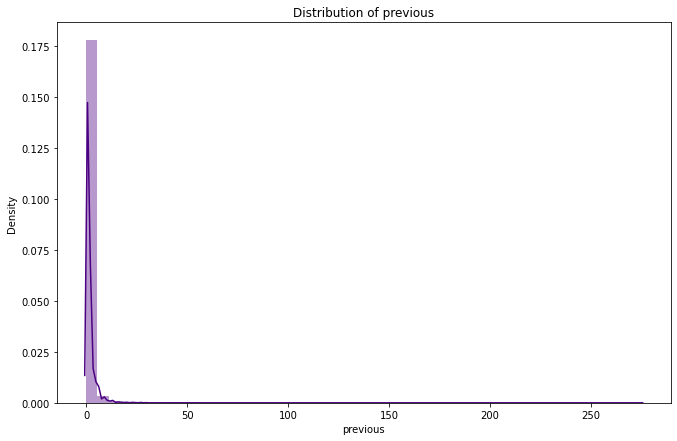

In [98]:
#Distribution plot of continuous feature
for col in continuous_feature:
  plt.figure(figsize=(11,7))
  sns.distplot(df[col], color ='indigo')
  plt.title("Distribution of {}".format(col))
  plt.show()

### **Take-away:**

it seems age, days distributed normally.

balance, duration, campaign, pdays and previous heavily skewed towards left and seems to be have some outliers.

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

**Correlation Matrix of the numerical features**

In [99]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


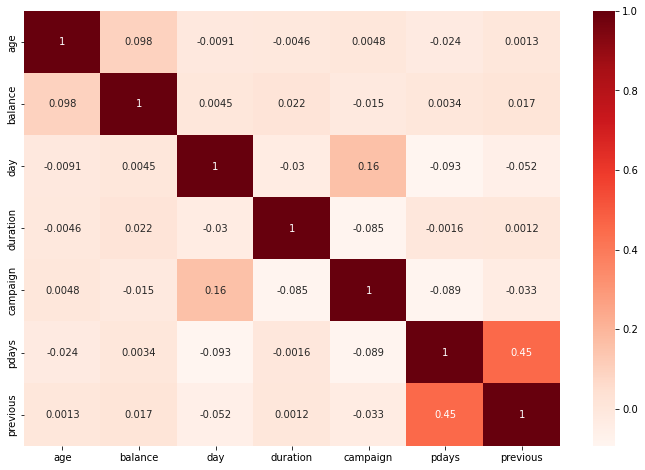

In [100]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap =plt.cm.Reds)

**From the above heatmap we can see that there are some continuous features which share a high correlation between them.**

# **Data Preprocessing**

In [101]:
df.shape

(45211, 17)

In [102]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


 **-- Creating one-hot encoding for non-numeric MARITAL column**

In [103]:
marital_dummies = pd.get_dummies(df['marital'], prefix= 'marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [104]:
# merge marital_dummies with marital column
pd.concat([df['marital'], marital_dummies], axis = 1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


We can see in each of the rows there is one value of 1, which is in the column corresponding the value in the marital column.

There are three values, if two of the values in the dummy columns are 0 for a particular row, then the remaining column must be equal to 1. It is important to eliminate any redundancy and correlations in features as it becomes difficult to determine which feature is most important in minimizing the total error.

So let us remove one column divorced.

In [105]:
# Remove marital_divorced column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [106]:
# merge marital_dummies into main dataframe
df = pd.concat([df, marital_dummies], axis = 1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


**-- Creating one hot encoding for JOB column**

In [107]:
job_dummies = pd.get_dummies(df['job'], prefix= 'job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [108]:
# Remove job_admin column
job_dummies.drop('job_admin.', axis=1, inplace=True)

In [109]:
# Merge job_dummies into main dataframe
df = pd.concat([df, job_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


**-- Creating one hot encoding for EDUCATION column**

In [110]:
education_dummies = pd.get_dummies(df['education'], prefix = 'education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [111]:
# Remove education_primary column
education_dummies.drop('education_primary', axis=1, inplace=True)

In [112]:
# Merge education_dummies into main dataframe
df = pd.concat([df, education_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


**-- Creating one hot encoding for CONTACT column**

In [113]:
contact_dummies = pd.get_dummies(df['contact'], prefix = 'contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [114]:
# Remove contact_cellular column
contact_dummies.drop('contact_cellular', axis=1, inplace=True)

In [115]:
# Merge contact_dummies into main dataframe
df = pd.concat([df, contact_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


**-- Creating one hot encoding for POUTCOME column**

In [121]:
poutcome_dummies = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [122]:
# Remove poutcome_failure column
poutcome_dummies.drop('poutcome_failure', axis=1, inplace=True)

In [123]:
#Merge potcome_dummies into main dataframe
df = pd.concat([df, poutcome_dummies], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,poutcome_other,poutcome_success,poutcome_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,1,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,1,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,1,0,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,0,0,1,0,0,1,0,0,1


**We can see there are some binary columns(default, housing, loan) which are object type, we need to convert into numeric value.**

**There are categorical columns also,but there are a limited number of choices. They are job, marital, education, contact, month, and poutcome. That also need to converted into numerical format.**

**All feature columns we need to convert into numeric values then only we can feed into the model.**

**Convert default column into numeric value
We can convert the yes values to 1,and the no values to 0 for default column
We will apply lamda function for it.**


**-- Convert month column into numeric value**

In [124]:
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
df['month'] = df['month'].map(months)
df['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [125]:
df[df['pdays'] == -1]['pdays'].count()

36954

In [126]:
df['was_contacted'] = df['pdays'].apply(lambda row: 0 if row == -1 else 1)
df[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


**-- Convert default column into numeric value**

In [127]:
df['is_default'] = df['default'].apply(lambda row: 1 if row == 'yes' else 0 )

In [128]:
# Veiw default and is_default columns together

df[['default', 'is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


**-- Convert housing column into numeric value**

In [129]:
df['is_housing'] = df['housing'].apply(lambda row : 1 if row == 'yes' else 0)

In [130]:
# Veiw housing  and is_housing columns together

df[['housing', 'is_housing']].head()

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


**-- Convert loan column into numeric value**

In [131]:
df['is_loan'] = df['loan'].apply(lambda row: 1 if row == 'yes' else 0)

In [132]:
# Veiw loan and is_loan columns together

df[['loan', 'is_loan']].head()

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


**-- Convert target column ‘y’ into numeric value**

In [133]:
df['target'] = df['y'].apply(lambda row: 1 if row == 'yes' else 0)

In [134]:
# Veiw y and target columns together
df[['y', 'target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [135]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome_success,poutcome_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


-- Delete job, education, default, housing, loan, contact, month, pdays, Marital, duration, age, day, poutcome, y columns

In [136]:
df.drop(['job', 'education', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y','month','duration','age','day'], axis=1, inplace=True)


In [137]:
df.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan       

In [138]:
df.shape

(45211, 36)

In [139]:
# remove the outlier using IsolationForest Technique

features = df.drop(['target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
df['is_anomaly'] = anomalies
df = df[df['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [140]:
df.shape

(40690, 36)

In [141]:
# Assigning values to independent variables
X = df.drop('target', axis = 1)
X.head()

,balance,campaign,pdays,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,poutcome_other,poutcome_success,poutcome_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan
0,2143,1,-1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
3,1506,1,-1,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [142]:
# Assigning the values of dependent variables
y = df['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [143]:
# Over sampling the data using SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(X.values, y.values)

### **SMOTE :-**

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

In [144]:
X.shape

(73672, 35)

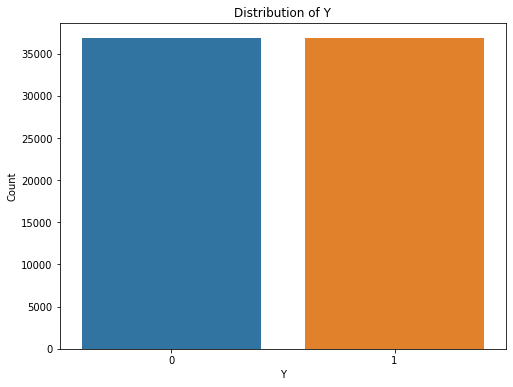

In [146]:
# countplot of dependent column y

plt.figure(figsize = (8,6))
sns.countplot(x = y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

### **Train-Test Split**

In [147]:
# Scale the data using Standard Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [148]:
# Split the data into train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.25, random_state =42)

In [149]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(55254, 35) (55254,)
(18418, 35) (18418,)


# **Models Implementation**

**Logistic Regression**

**K - Nearest Neighbors** 

**XGBoost Classifier**

**Decision Tree**

**Random Forest**

# **1. Logistic Regression**

Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [150]:
# fitting model to logistic regression
log_model = LogisticRegression(fit_intercept = True, max_iter = 10000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [151]:
# get the model coefficients
log_model.coef_

array([[ 0.00188324, -0.47254981,  0.04536471,  0.00995902, -0.78783273,
        -0.60042077, -0.95977286, -0.44088012, -0.53573922, -0.85109638,
        -0.47963738, -0.4423809 , -0.60503895, -0.21443867, -0.77864288,
        -0.42311317, -0.22289347, -0.80231975, -0.51393753, -0.3143668 ,
        -0.24445759, -0.81404317, -0.03961091,  0.        , -0.43995337,
        -0.03961091,  0.        , -0.43995337, -0.03961091,  0.        ,
        -0.43995337, -1.43047094, -0.11964458, -0.56046202, -0.42515605]])

In [152]:
#Get the model intercept
log_model.intercept_

array([0.1062296])

In [153]:
#Get the predicted probabilities
train_preds = log_model.predict_proba(X_train)
test_preds = log_model.predict_proba(X_test)

In [154]:
# Get the predicted classes
train_class_preds = log_model.predict(X_train)
test_class_preds = log_model.predict(X_test)

In [155]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.866905563398125
The accuracy on test data is  0.8644803996090781


[[24645  2956]
 [ 4398 23255]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

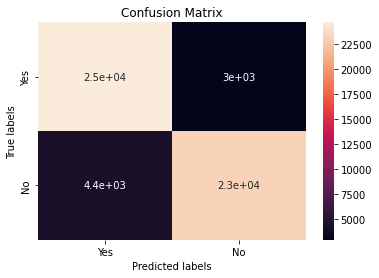

In [156]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8243  992]
 [1504 7679]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

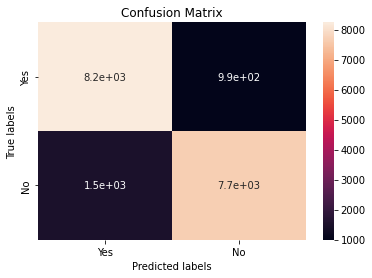

In [157]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [158]:
log_train_preds = log_model.predict_proba(X_train)[:,1]
log_test_preds = log_model.predict_proba(X_test)[:,1]

In [159]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,log_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,log_test_preds))

Train ROC-AUC score :  0.9354860998687151
Test ROC-AUC score :  0.9326455319470826


In [160]:
# Classification Report

from sklearn.metrics import classification_report

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29043
          no       0.84      0.89      0.86     26211

    accuracy                           0.87     55254
   macro avg       0.87      0.87      0.87     55254
weighted avg       0.87      0.87      0.87     55254



              precision    recall  f1-score   support

         yes       0.89      0.85      0.87      9747
          no       0.84      0.89      0.86      8671

    accuracy                           0.86     18418
   macro avg       0.86      0.87      0.86     18418
weighted avg       0.87      0.86      0.86     18418



**HYPERPARAMETER TUNING**

In [161]:
# Hyperprarameter tuning using GridSearchCV

logistic_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(logistic_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................................C=1e-05; total time=   0.3s
[CV] END ............................................C=1e-05; total time=   0.3s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ............................................C=1e-05; total time=   0.2s
[CV] END ...........................................C=0.0001; total time=   0.2s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [162]:
log_optimal_model = log_grid.best_estimator_

In [163]:
# Making predictions on train and test data

train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [164]:
# Calculating accuracy on train and test
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", log_train_accuracy)
print("The accuracy on test dataset is", log_test_accuracy)

The accuracy on train dataset is 0.8668874651608933
The accuracy on test dataset is 0.8644803996090781


[[24645  2956]
 [ 4399 23254]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

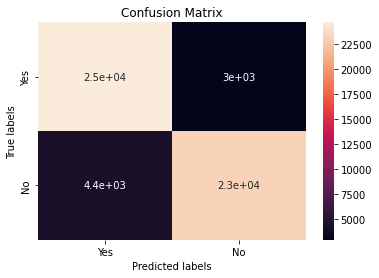

In [165]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8243  992]
 [1504 7679]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

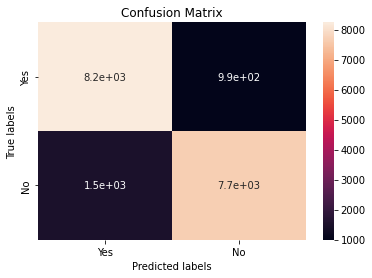

In [166]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [167]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [168]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,log_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,log_optimal_test_preds))

Train ROC-AUC score :  0.9354830340336527
Test ROC-AUC score :  0.9326616394869618


In [169]:
# classification_report after CV

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))


              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29044
          no       0.84      0.89      0.86     26210

    accuracy                           0.87     55254
   macro avg       0.87      0.87      0.87     55254
weighted avg       0.87      0.87      0.87     55254



              precision    recall  f1-score   support

         yes       0.89      0.85      0.87      9747
          no       0.84      0.89      0.86      8671

    accuracy                           0.86     18418
   macro avg       0.86      0.87      0.86     18418
weighted avg       0.87      0.86      0.86     18418



# **2. K-Nearest Neighbors (KNN)**

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [170]:
# Setup a knn classifier with k neighbors
K_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
K_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [171]:
train_class_preds = K_model.predict(X_train)
test_class_preds = K_model.predict(X_test)

In [172]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9312086002823325
The accuracy on test data is  0.885926810728635


[[25889  1712]
 [ 2089 25564]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

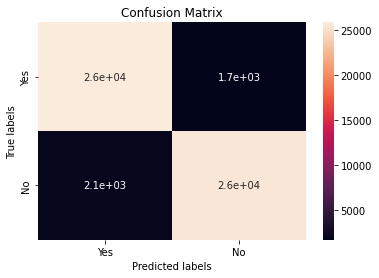

In [173]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8192 1043]
 [1058 8125]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

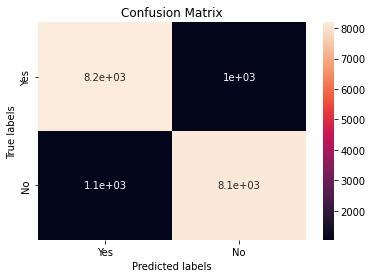

In [174]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [175]:
K_train_preds = K_model.predict_proba(X_train)[:,1]
K_test_preds = K_model.predict_proba(X_test)[:,1]

In [176]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,K_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,K_test_preds))

Train ROC-AUC score :  0.9859104937865002
Test ROC-AUC score :  0.9240138774828207


In [177]:
# Classification Report

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.94      0.93      0.93     27978
          no       0.92      0.94      0.93     27276

    accuracy                           0.93     55254
   macro avg       0.93      0.93      0.93     55254
weighted avg       0.93      0.93      0.93     55254



              precision    recall  f1-score   support

         yes       0.89      0.89      0.89      9250
          no       0.88      0.89      0.89      9168

    accuracy                           0.89     18418
   macro avg       0.89      0.89      0.89     18418
weighted avg       0.89      0.89      0.89     18418



**HYPERPARAMETER TUNING**

In [178]:
#Hyperprarameter tuning using GridSearchCV

K_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
K_grid = GridSearchCV(K_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
K_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................................n_neighbors=1; total time=   4.8s
[CV] END ......................................n_neighbors=1; total time=   4.8s
[CV] END ......................................n_neighbors=1; total time=   4.9s
[CV] END ......................................n_neighbors=1; total time=   4.9s
[CV] END ......................................n_neighbors=1; total time=   6.1s
[CV] END ......................................n_neighbors=3; total time=  10.1s
[CV] END ......................................n_neighbors=3; total time=   9.5s
[CV] END ......................................n_neighbors=3; total time=   9.8s
[CV] END ......................................n_neighbors=3; total time=   6.6s
[CV] END ......................................n_neighbors=3; total time=   8.9s
[CV] END ......................................n_neighbors=5; total time=  10.8s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='roc_auc', verbose=2)

In [182]:
K_grid.best_estimator_

KNeighborsClassifier(n_neighbors=19)

In [184]:
K_optimal_model = K_grid.best_estimator_

In [185]:
# Making predictions on train and test data

train_class_preds = K_optimal_model.predict(X_train)
test_class_preds = K_optimal_model.predict(X_test)

In [186]:
# Calculating accuracy on train and test
K_train_accuracy = accuracy_score(y_train,train_class_preds)
K_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", K_train_accuracy)
print("The accuracy on test dataset is", K_test_accuracy)

The accuracy on train dataset is 0.8863430701849639
The accuracy on test dataset is 0.8744163318492779


[[25186  2415]
 [ 3865 23788]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

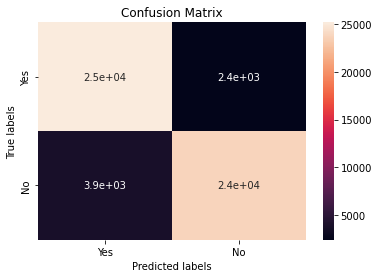

In [187]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8336  899]
 [1414 7769]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

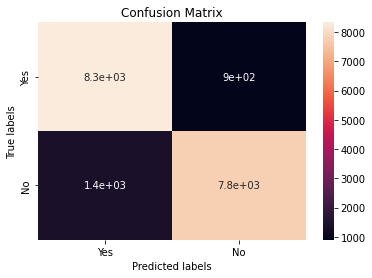

In [188]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [189]:
K_optimal_train_preds = K_optimal_model.predict_proba(X_train)[:,1]
K_optimal_test_preds = K_optimal_model.predict_proba(X_test)[:,1]

In [190]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,K_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,K_optimal_test_preds))

Train ROC-AUC score :  0.9561458196736897
Test ROC-AUC score :  0.937959593304664


In [191]:
# Classification Report after CV

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.87      0.89     29051
          no       0.86      0.91      0.88     26203

    accuracy                           0.89     55254
   macro avg       0.89      0.89      0.89     55254
weighted avg       0.89      0.89      0.89     55254

              precision    recall  f1-score   support

         yes       0.90      0.85      0.88      9750
          no       0.85      0.90      0.87      8668

    accuracy                           0.87     18418
   macro avg       0.87      0.88      0.87     18418
weighted avg       0.88      0.87      0.87     18418



# **3. XGBoost Classifier**

XGBoost or extreme gradient boosting is one of the well-known gradient boosting techniques(ensemble) having enhanced performance and speed in tree-based (sequential decision trees) machine learning algorithms.

In [192]:
import xgboost as xgb

In [193]:
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier()

In [194]:
# Get the predicted classes

train_class_preds = XGB_model.predict(X_train)
test_class_preds = XGB_model.predict(X_test)

In [195]:
# Get the Accuracy classes

train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8685886994606725
The accuracy on test data is  0.8675209034640026


[[24376  3225]
 [ 4036 23617]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

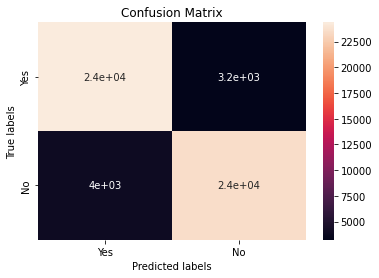

In [196]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8157 1078]
 [1362 7821]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

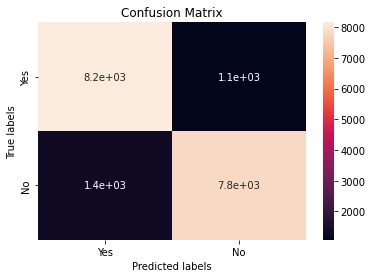

In [197]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [198]:
XGB_train_preds =  XGB_model.predict_proba(X_train)[:, 1]
XGB_test_preds =  XGB_model.predict_proba(X_test)[:, 1]

In [199]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,XGB_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,XGB_test_preds))

Train ROC-AUC score :  0.9377075089662608
Test ROC-AUC score :  0.9335426959764934


In [200]:
# classification Report

target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.88      0.86      0.87     28412
          no       0.85      0.88      0.87     26842

    accuracy                           0.87     55254
   macro avg       0.87      0.87      0.87     55254
weighted avg       0.87      0.87      0.87     55254



              precision    recall  f1-score   support

         yes       0.88      0.86      0.87      9519
          no       0.85      0.88      0.87      8899

    accuracy                           0.87     18418
   macro avg       0.87      0.87      0.87     18418
weighted avg       0.87      0.87      0.87     18418



**HYPERPARAMETER TUNING**

In [201]:
# Hyperparameter tuning using GridSearchCV
XGB_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
XGB_grid = GridSearchCV(XGB_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
XGB_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   3.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   4.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='roc_auc', verbose=2)

In [202]:
XGB_optimal_model =XGB_grid.best_estimator_

In [203]:
# Making predictions on train and test data

train_class_preds = XGB_optimal_model.predict(X_train)
test_class_preds = XGB_optimal_model.predict(X_test)

In [204]:
# Calculating accuracy on train and test

XGB_train_accuracy = accuracy_score(y_train,train_class_preds)
XGB_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", XGB_train_accuracy)
print("The accuracy on test dataset is", XGB_test_accuracy)

The accuracy on train dataset is 0.9544648351250589
The accuracy on test dataset is 0.9088934737756542


[[26589  1012]
 [ 1504 26149]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

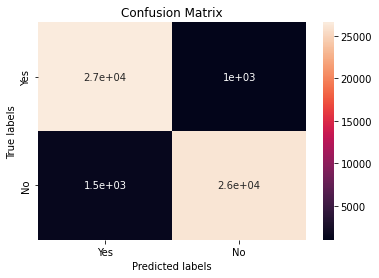

In [205]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8525  710]
 [ 968 8215]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

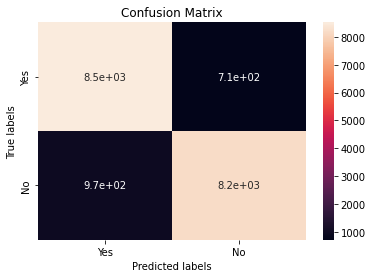

In [206]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [207]:
XGB_train_preds =  XGB_model.predict_proba(X_train)[:, 1]
XGB_test_preds =  XGB_model.predict_proba(X_test)[:, 1]

In [208]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,XGB_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,XGB_test_preds))

Train ROC-AUC score :  0.9377075089662608
Test ROC-AUC score :  0.9335426959764934


In [209]:
# classification Report

target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.96      0.95      0.95     28093
          no       0.95      0.96      0.95     27161

    accuracy                           0.95     55254
   macro avg       0.95      0.95      0.95     55254
weighted avg       0.95      0.95      0.95     55254



              precision    recall  f1-score   support

         yes       0.92      0.90      0.91      9493
          no       0.89      0.92      0.91      8925

    accuracy                           0.91     18418
   macro avg       0.91      0.91      0.91     18418
weighted avg       0.91      0.91      0.91     18418



In [211]:
importances = XGB_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
21,contact_unknown,0.12
8,job_housemaid,0.10
15,job_unemployed,0.07
11,job_self-employed,0.07
33,is_housing,0.06
7,job_entrepreneur,0.06
34,is_loan,0.05
10,job_retired,0.05
14,job_technician,0.04
6,job_blue-collar,0.04


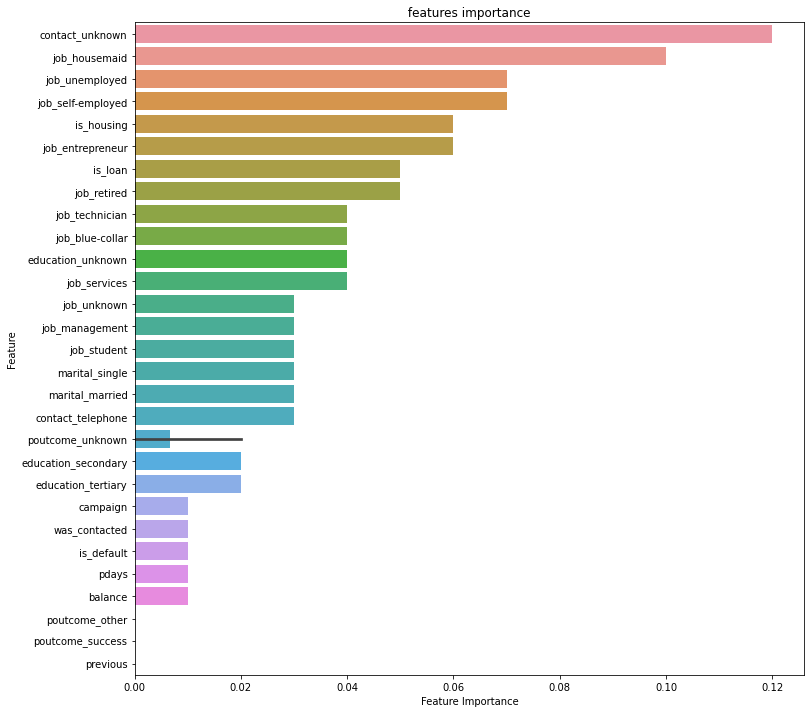

In [212]:
plt.figure(figsize=(12,12))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature", data=fim_gb_df)

# **4. Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [213]:
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [214]:
# Get the predicted classes
train_class_preds = dec_tree_model.predict(X_train)
test_class_preds = dec_tree_model.predict(X_test)

In [215]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9911499619937019
The accuracy on test data is  0.8824519491801499


[[27329   272]
 [  217 27436]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

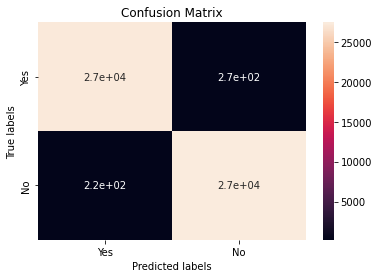

In [216]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7948 1287]
 [ 878 8305]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

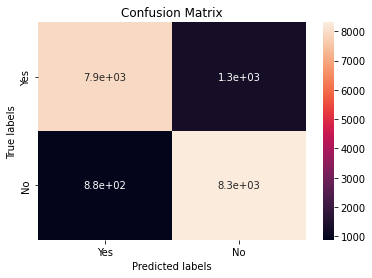

In [217]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [218]:
dec_tree_train_preds = dec_tree_model.predict_proba(X_train)[:,1]
dec_tree_test_preds = dec_tree_model.predict_proba(X_test)[:,1]

In [219]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,dec_tree_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,dec_tree_test_preds))

Train ROC-AUC score :  0.9997945359883068
Test ROC-AUC score :  0.888389535499703


In [220]:
# Classification Report

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27546
          no       0.99      0.99      0.99     27708

    accuracy                           0.99     55254
   macro avg       0.99      0.99      0.99     55254
weighted avg       0.99      0.99      0.99     55254



              precision    recall  f1-score   support

         yes       0.86      0.90      0.88      8826
          no       0.90      0.87      0.88      9592

    accuracy                           0.88     18418
   macro avg       0.88      0.88      0.88     18418
weighted avg       0.88      0.88      0.88     18418



**HYPERPARAMETER TUNING**

In [221]:
#Hyperprarameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
dec_tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
dec_tree_grid = GridSearchCV(dec_tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
dec_tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.3s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [222]:
dec_tree_optimal_model = dec_tree_grid.best_estimator_

In [223]:
# Making predictions on train and test data

train_class_preds = dec_tree_optimal_model.predict(X_train)
test_class_preds = dec_tree_optimal_model.predict(X_test)

In [224]:
# Calculating accuracy on train and test
dec_tree_train_accuracy = accuracy_score(y_train,train_class_preds)
dec_tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", dec_tree_train_accuracy)
print("The accuracy on test dataset is", dec_tree_test_accuracy)

The accuracy on train dataset is 0.8481919861005538
The accuracy on test dataset is 0.836247149527636


[[23133  4468]
 [ 3920 23733]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

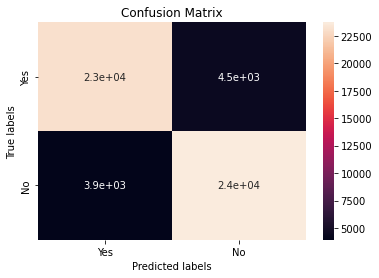

In [225]:
# Confusion matrix for train 

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[7641 1594]
 [1422 7761]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

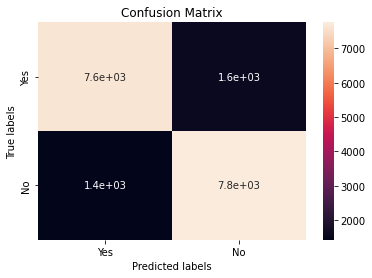

In [226]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [227]:
dec_tree_optimal_train_preds = dec_tree_optimal_model.predict_proba(X_train)[:,1]
dec_tree_optimal_test_preds = dec_tree_optimal_model.predict_proba(X_test)[:,1]

In [228]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,dec_tree_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,dec_tree_optimal_test_preds))

Train ROC-AUC score :  0.926485830071299
Test ROC-AUC score :  0.9103429213877177


In [229]:
# Classification Report after CV

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.84      0.86      0.85     27053
          no       0.86      0.84      0.85     28201

    accuracy                           0.85     55254
   macro avg       0.85      0.85      0.85     55254
weighted avg       0.85      0.85      0.85     55254



              precision    recall  f1-score   support

         yes       0.83      0.84      0.84      9063
          no       0.85      0.83      0.84      9355

    accuracy                           0.84     18418
   macro avg       0.84      0.84      0.84     18418
weighted avg       0.84      0.84      0.84     18418



In [230]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [231]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'marital_married',
       'marital_single', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'was_contacted', 'is_default', 'is_housing', 'is_loan'],
      dtype='object')

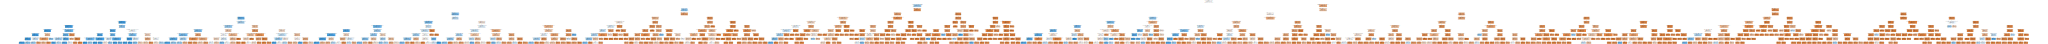

<Figure size 216x216 with 0 Axes>

In [232]:
plt.figure(figsize=(3,3))
graph = Source(tree.export_graphviz(dec_tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [233]:
importances = dec_tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
33,is_housing,0.27
21,contact_unknown,0.15
4,marital_married,0.09
5,marital_single,0.09
34,is_loan,0.07
1,campaign,0.05
0,balance,0.05
6,job_blue-collar,0.04
9,job_management,0.04
14,job_technician,0.04


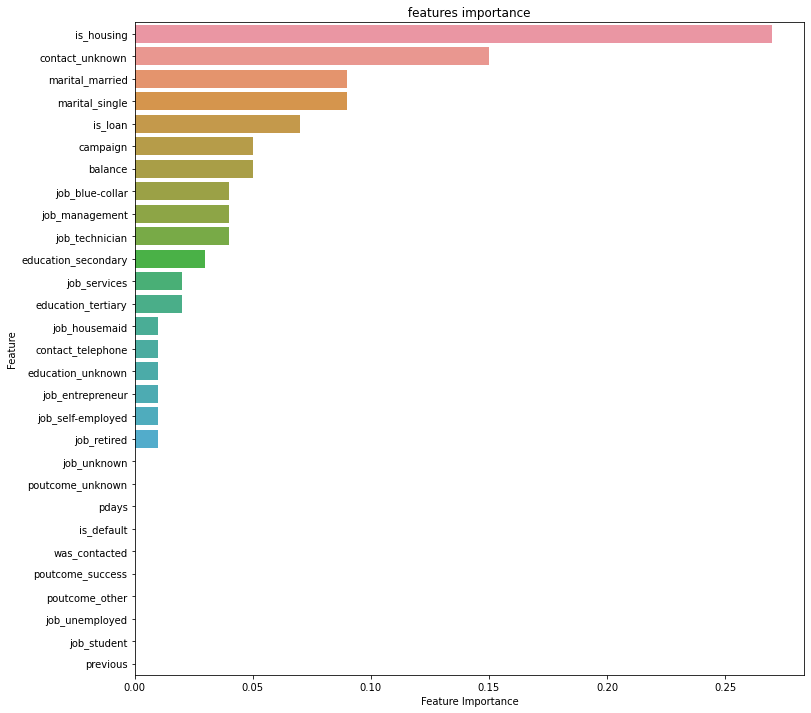

In [234]:
plt.figure(figsize=(12,12))
plt.title(' features importance ')
sns.barplot(x='Feature Importance', y="Feature", data=fim_gb_df)
plt.show()

# **5. Random Forest**

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [235]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train , y_train)

RandomForestClassifier()

In [236]:
# Get the predicted classes
train_class_preds = RF_model.predict(X_train)
test_class_preds = RF_model.predict(X_test)

In [237]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9910956672820067
The accuracy on test data is  0.8967314583559561


[[27293   308]
 [  184 27469]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

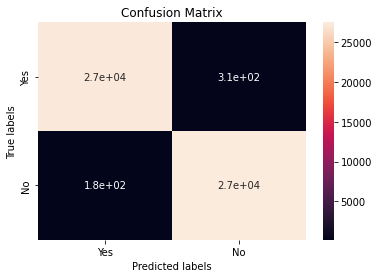

In [239]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8247  988]
 [ 914 8269]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

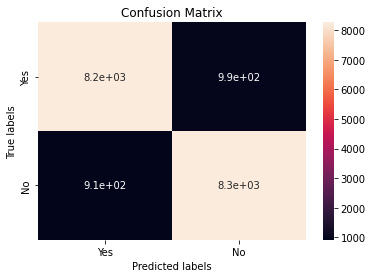

In [240]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [241]:
RF_train_preds = RF_model.predict_proba(X_train)[:,1]
RF_test_preds = RF_model.predict_proba(X_test)[:,1]

In [242]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,RF_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,RF_test_preds))

Train ROC-AUC score :  0.999217881892302
Test ROC-AUC score :  0.9497366399542102


In [243]:
# Classification Report

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27477
          no       0.99      0.99      0.99     27777

    accuracy                           0.99     55254
   macro avg       0.99      0.99      0.99     55254
weighted avg       0.99      0.99      0.99     55254



              precision    recall  f1-score   support

         yes       0.89      0.90      0.90      9161
          no       0.90      0.89      0.90      9257

    accuracy                           0.90     18418
   macro avg       0.90      0.90      0.90     18418
weighted avg       0.90      0.90      0.90     18418



**HYPERPARAMETER TUNING**

In [244]:
#Hyperprarameter tuning using GridSearchCV
RF_grid = RandomForestClassifier()
parameters = {
                'n_estimators' : [50,75,100],
                'max_depth' : [4,6,8,10],
                'min_samples_split' : [50,100,150],
                'min_samples_leaf' : [40,45,50]

}
RF_grid = GridSearchCV(RF_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
RF_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75; total time=   3.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75; total time=   3.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=75; total time=   3.5s
[CV] END max_depth=4, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 45, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 75, 100]},
             scoring='roc_auc', verbose=2)

In [245]:
RF_optimal_model = RF_grid.best_estimator_

In [246]:
# Making predictions on train and test data

train_class_preds = RF_optimal_model.predict(X_train)
test_class_preds = RF_optimal_model.predict(X_test)

In [247]:
# Calculating accuracy on train and test
RF_train_accuracy = accuracy_score(y_train,train_class_preds)
RF_test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", RF_train_accuracy)
print("The accuracy on test dataset is", RF_test_accuracy)

The accuracy on train dataset is 0.8552502986209143
The accuracy on test dataset is 0.8532956889998914


[[24445  3156]
 [ 4842 22811]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

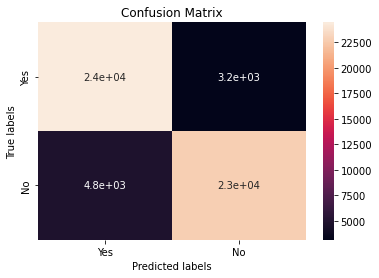

In [248]:
# Confusion matrix for train

labels = ['Yes', 'No']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[8150 1085]
 [1617 7566]]


[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

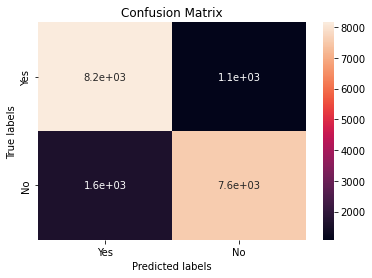

In [249]:
# Confusion matrix for test

labels = ['Yes', 'No']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [250]:
RF_optimal_train_preds = RF_optimal_model.predict_proba(X_train)[:,1]
RF_optimal_test_preds = RF_optimal_model.predict_proba(X_test)[:,1]

In [251]:
print('Train ROC-AUC score : ', roc_auc_score(y_train,RF_optimal_train_preds))
print('Test ROC-AUC score : ', roc_auc_score(y_test,RF_optimal_test_preds))

Train ROC-AUC score :  0.9278333680857966
Test ROC-AUC score :  0.9228634618911937


In [252]:
# Classification Report after CV

target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.83      0.86     29287
          no       0.82      0.88      0.85     25967

    accuracy                           0.86     55254
   macro avg       0.86      0.86      0.86     55254
weighted avg       0.86      0.86      0.86     55254



              precision    recall  f1-score   support

         yes       0.88      0.83      0.86      9767
          no       0.82      0.87      0.85      8651

    accuracy                           0.85     18418
   macro avg       0.85      0.85      0.85     18418
weighted avg       0.85      0.85      0.85     18418



In [253]:
RF_model.feature_importances_

array([2.78035264e-01, 5.91197709e-02, 1.70828710e-02, 6.70265348e-03,
       6.36439963e-02, 3.58787679e-02, 4.97604395e-02, 1.26075655e-02,
       1.62719638e-02, 3.77081050e-02, 1.50010074e-02, 1.34692651e-02,
       2.33308921e-02, 4.62542658e-03, 3.67054376e-02, 1.25815984e-02,
       2.97920281e-03, 4.23049511e-02, 2.82754860e-02, 1.06764214e-02,
       1.29004809e-02, 9.76127264e-02, 4.39540133e-05, 0.00000000e+00,
       1.28400176e-03, 3.76726649e-05, 0.00000000e+00, 1.34552994e-03,
       3.93795435e-05, 0.00000000e+00, 1.10188596e-03, 1.74434811e-03,
       3.11860339e-03, 8.19118648e-02, 3.20984666e-02])

In [254]:
importances = RF_model.feature_importances_

importance_dict = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)                            
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
new_df=importance_df.sort_values(by=['Feature Importance'],ascending=False)
new_df

,Feature,Feature Importance
0,balance,0.28
21,contact_unknown,0.10
33,is_housing,0.08
4,marital_married,0.06
1,campaign,0.06
6,job_blue-collar,0.05
9,job_management,0.04
14,job_technician,0.04
17,education_secondary,0.04
5,marital_single,0.04


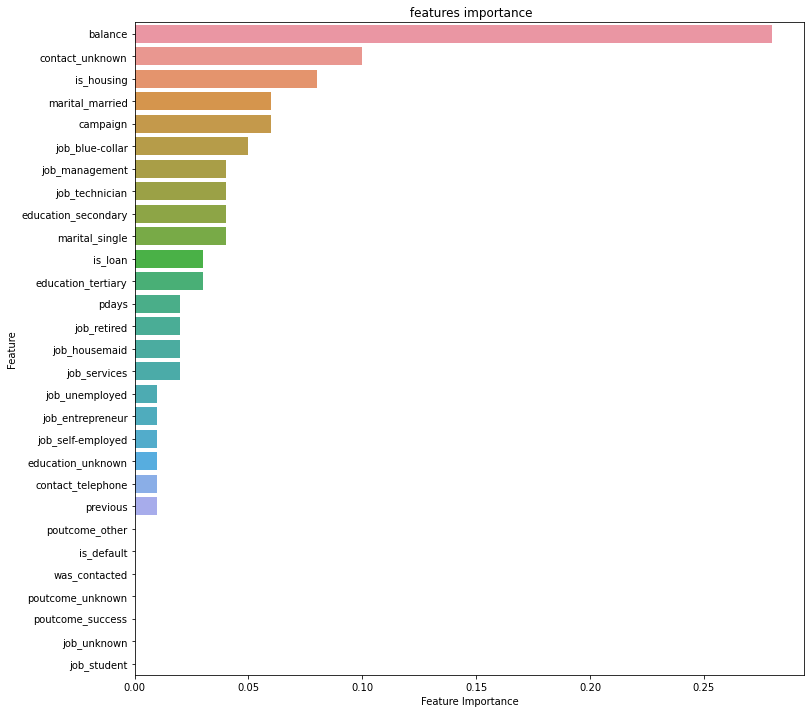

In [255]:
plt.figure(figsize=(12,12))
plt.title(' features importance')
sns.barplot(x='Feature Importance',y="Feature",data=new_df)

# **CONCLUSION**

- For age , most of the customers are in the age range of 30-40.

- For balance , above 1000$ is like to subscribe a term deposite .

- The model can help to classify the customers on the basis on which they deposit or not

- The model helps to target the right customer rather than wasting time on wrong customer

- Comparing to all algorithms **XGboost algorithm** has best accuracy score and ROC-AUC score . So it is concluded as optimal model.